# Implementing ANN using Keras and Tensorflow

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

In [ ]:
# Checking version of TnesorFlow and Keras

print(f"Tensorflow version: {tf.__version__}")
print(f"Keras version: {tf.keras.__version__}")

Tensorflow version: 2.18.0
Keras version: 3.8.0


In [ ]:
os.getcwd()

'/content'

# GPU/CPU check

### NOTE: One of the benefit of Google Colab is that we can lend its GPU/CPU when required.

## Before Selecting GPU

In [ ]:
tf.config.list_physical_devices("GPU")

[]

In [ ]:
tf.config.list_physical_devices("CPU")

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [ ]:
check_list = ["GPU", "CPU"]

for device in check_list:
    out= tf.config.list_physical_devices(device)

    if len(out) > 0:
      print(f" {device} is available")
      print(f"Details: {out}")
    else:
      print(f"{device} is not available")


GPU is not available
 CPU is available
Details: [PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]


### NOTE: Go to runtime and select "GPU" and then restart the kernel and run the cell again. Now GPU is getting utilized.

Next 3 lines are repeated to show the different results.

## After Selecting CPU

In [ ]:
tf.config.list_physical_devices("GPU")

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [ ]:
tf.config.list_physical_devices("CPU")

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [ ]:
check_list = ["GPU", "CPU"]

for device in check_list:
    out= tf.config.list_physical_devices(device)

    if len(out) > 0:
      print(f" {device} is available")
      print(f"Details: {out}")
    else:
      print(f"{device} is not available")


 GPU is available
Details: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
 CPU is available
Details: [PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]


# Creating a simple Classifier using Keras on MNIST data(numbers with different style)

In [2]:
mnist = tf.keras.datasets.mnist

In [3]:
mnist

<module 'keras.api.datasets.mnist' from '/usr/local/lib/python3.11/dist-packages/keras/api/datasets/mnist/__init__.py'>

In [4]:
(x_train_full, y_train_full), (x_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [5]:
x_train_full.shape, x_test.shape, y_train_full.shape, y_test.shape

((60000, 28, 28), (10000, 28, 28), (60000,), (10000,))

**NOTE:** (60000, 28, 28) means that there are 60k images in the training data where, easch image size is (28 X 28) sq. units.

In [6]:
x_train_full[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 170,
        253, 253, 253, 253, 253, 225, 172, 253, 242, 195,  64,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  49, 238, 253, 253, 253, 253,
        253, 253, 253, 253, 251,  93,  82,  82,  56,  39,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  18, 219, 253, 253, 253, 253,
        253, 198, 182, 247, 241,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  80, 156, 107, 253, 253,
        205,  11,   0,  43, 154,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  14,   1, 154, 253,
         90,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 139, 253,
        190,   2,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  11, 190,
        253,  70,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  35,
        241, 225, 160, 108,   1,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         81, 240, 253, 253, 119,  25,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  45, 186, 253, 253, 150,  27,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  16,  93, 252, 253, 187,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0, 249, 253, 249,  64,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  46, 130, 183, 253, 253, 207,   2,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  39,
        148, 229, 253, 253, 253, 250, 182,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  24, 114, 221,
        253, 253, 253, 253, 201,  78,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  23,  66, 213, 253, 253,
        253, 253, 198,  81,   2,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  18, 171, 219, 253, 253, 253, 253,
        195,  80,   9,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,  55, 172, 226, 253, 253, 253, 253, 244, 133,
         11,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0, 136, 253, 25

In [7]:
x_train_full.dtype

dtype('uint8')

## Creating a Validation dataset from the full training data

In [8]:
# Splitting dataset into Validation-Train for model training

x_valid, x_train = x_train_full[:5000], x_train_full[5000:]
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

 ### Scaling dataset between (0-1) by dividing them by 255, as they are unsigned integer ranging (0-255).

 We can see in an image, presented by a matrix[28][28], values ranging from 0 to 255.

In [9]:
# Scaling the validation and train data
x_valid = x_valid / 255
x_train = x_train / 255

# Scaling test data
x_test = x_test / 255

In [10]:
x_valid.shape, x_train.shape, x_test.shape

((5000, 28, 28), (55000, 28, 28), (10000, 28, 28))

# Let's view some data

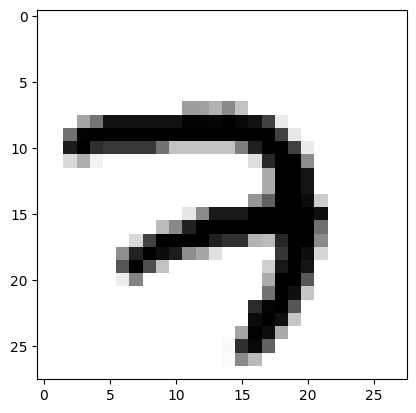

In [11]:
plt.imshow(x_train[0], cmap = "binary")
plt.show()

<Axes: >

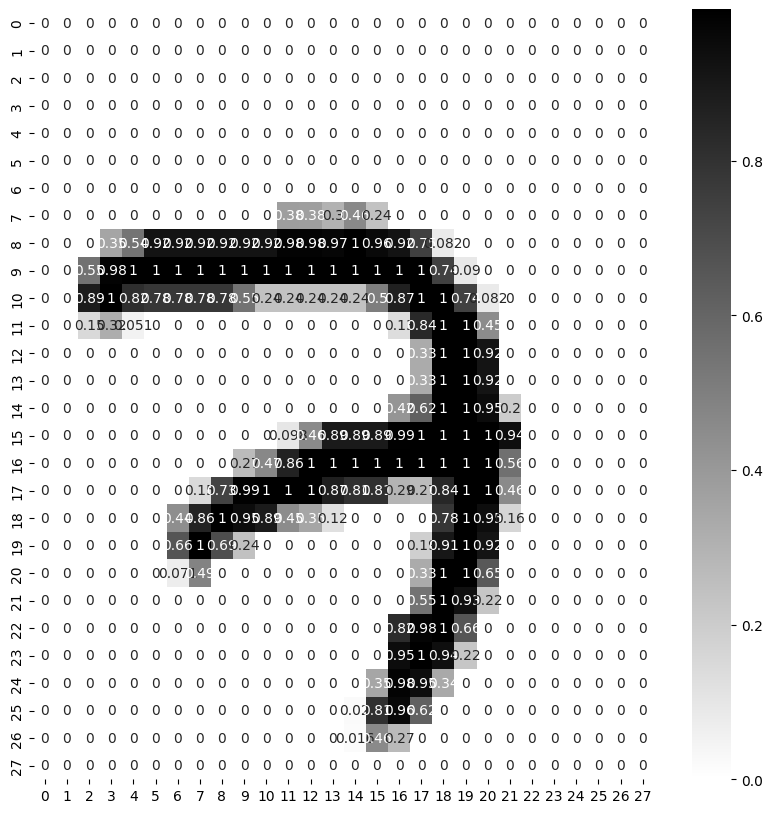

In [12]:
# Lets view the same in a Heatmap

plt.figure(figsize = (10,10))
sns.heatmap(x_train[0], annot = True, cmap = "binary")

# Implementing a simple ANN

## About the Problem statement:

Here, we have a dataset of 70,000 images where each image is 28 X 28 array.

Each image displays a number range from 0 - 9 numbers, using different intensities in different rows and columns in an array. (Eg- Number 7 in the Heatmap above).

To predict -> If we have an image like this(28 x 28 array), what number it displays?

O/P = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]  

As we can see this problem is **"Multi Class Classification"**(have 10 classes/numbers)

We can use *Softmax Activation Function* when there is Mutli Class Classification.

# Architecture Used:

Number of nodes/Neuron/Perceptron per Layer:

I/P Layer -> Hidden1 Layer -> Hidden2 Layer -> O/P Layer

784  -> 300 -> 100 -> 10

**Note:** We cannot directly give the dataset in an ANN, So we flatten it first.

So, in first I/P Layer, we flatten the data through (28*28 = ) 784 nodes.

In [13]:
# Creating layers of ANN

# Method-1
LAYERS = [
    tf.keras.layers.Flatten(input_shape=[28,28], name= "inputLayer"),
    tf.keras.layers.Dense(300, activation= "relu", name= "hiddenLayer1"),
    tf.keras.layers.Dense(100, activation= "relu", name= "hiddenLayer2"),
    tf.keras.layers.Dense(10, activation= "softmax", name= "outputLayer"),
]

model_clf = tf.keras.models.Sequential(LAYERS)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [14]:
# Method-2

from keras.models import Sequential
from keras.layers import Dense, Flatten

# Define the model
model = Sequential()
model.add(Dense(units= 64, activation= "relu", input_dim= 100))
model.add(Dense(units= 10, activation= "softmax"))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [15]:
model_clf.layers

[<Flatten name=inputLayer, built=True>,
 <Dense name=hiddenLayer1, built=True>,
 <Dense name=hiddenLayer2, built=True>,
 <Dense name=outputLayer, built=True>]

In [22]:
first_layer = model_clf.layers[0]
first_layer.name

'inputLayer'

In [23]:
second_layer = model_clf.layers[1]
second_layer.name

'hiddenLayer1'

In [25]:
len(second_layer.get_weights())

2

In [28]:
# These 2 arrays are Weights(784 * 300 = 2,35,200) and biases(300) makes total of 2,35,500.

second_layer.get_weights()[0].shape         # Initial weights

(784, 300)

In [30]:
second_layer.get_weights()[1].shape         # Bias

(300,)

In [31]:
weights, biases = second_layer.get_weights()

In [34]:
print("Weights: ", weights.shape)
print("Bias: ", biases.shape)

Weights:  (784, 300)
Bias:  (300,)


In [24]:
second_layer.get_weights()

[array([[ 0.00821277, -0.04717799, -0.05492791, ..., -0.02946752,
          0.0417491 ,  0.02738255],
        [-0.00368515,  0.05704591, -0.04258674, ...,  0.01395174,
          0.06566067, -0.0079644 ],
        [-0.06959049,  0.02842832,  0.02053584, ...,  0.0623519 ,
          0.01006024,  0.03359088],
        ...,
        [-0.00872348, -0.03473221,  0.0514762 , ..., -0.0012221 ,
         -0.01695077, -0.03097166],
        [-0.00435938, -0.0605858 ,  0.05667558, ...,  0.07360554,
         -0.02056993,  0.05421712],
        [-0.00254878, -0.0630486 , -0.00143522, ..., -0.05645391,
          0.00420513,  0.00561503]], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.

In [16]:
model_clf.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ inputLayer (Flatten)                 │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ hiddenLayer1 (Dense)                 │ (None, 300)                 │         235,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ hiddenLayer2 (Dense)                 │ (None, 100)                 │          30,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ outputLayer (Dense)                  │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

# During Back propagation in ANN, How many parameters needs to be updated/optimized?

i.) For Hidden layer1, there are 300*784 weights and 300 own biases.

n(HL1) = 300*784 + 300 = 2,35,500

ii.) Similarly, for Hidden layer2, we have

n(HL2) = 100*300 + 100 = 30,100

iii.) Similarly, for Hidden layer3, we have

n(O/P) = 10*100 + 10 = 1,010

Total parameters = 2,35,500 + 30100 + 1010 = 2,66,610

In [18]:
784*300 + 300

235500

## Compiling the model

In [38]:
LOSS_FUNCTION = "sparse_categorical_crossentropy"       # Use tf.losses.sparese_categorical_crossentropy
OPTIMIZER = "SGD"                                      # Use tf.keras.optimizers.SGD(0.02) with Custom learning rate
METRICS = ["accuracy"]

model_clf.compile(loss= LOSS_FUNCTION,
                   optimizer = OPTIMIZER,
                  metrics = METRICS)

## Training the model

In [39]:
EPOCHS = 30
VALIDATION_SET = (x_valid, y_valid)

history = model_clf.fit(x_train, y_train,
                        epochs= EPOCHS,
                        validation_data= VALIDATION_SET,
                        batch_size= 32)

Epoch 1/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.7410 - loss: 0.9960 - val_accuracy: 0.9162 - val_loss: 0.3024
Epoch 2/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9132 - loss: 0.3037 - val_accuracy: 0.9350 - val_loss: 0.2361
Epoch 3/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9294 - loss: 0.2438 - val_accuracy: 0.9440 - val_loss: 0.2016
Epoch 4/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9414 - loss: 0.2052 - val_accuracy: 0.9512 - val_loss: 0.1742
Epoch 5/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9493 - loss: 0.1795 - val_accuracy: 0.9560 - val_loss: 0.1585
Epoch 6/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9544 - loss: 0.1567 - val_accuracy: 0.9610 - val_loss: 0.1440
Epoch 7/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9588 - loss: 0.1423 - val_accuracy: 0.9618 - val_loss: 0.1366
Epoch 8/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9637 - loss: 0.1310 

In [40]:
history.params

{'verbose': 'auto', 'epochs': 30, 'steps': 1719}

In [41]:
pd.DataFrame(history.history)

,accuracy,loss,val_accuracy,val_loss
0,0.847273,0.594243,0.9162,0.302422
1,0.918236,0.284155,0.9350,0.236116
2,0.932909,0.233357,0.9440,0.201580
3,0.942473,0.200544,0.9512,0.174230
4,0.949745,0.176443,0.9560,0.158531
5,0.955055,0.156810,0.9610,0.143983
6,0.959745,0.141407,0.9618,0.136578
7,0.964109,0.128270,0.9632,0.127532
8,0.966582,0.116892,0.9672,0.118239
9,0.969891,0.107271,0.9694,0.110205


<Axes: >

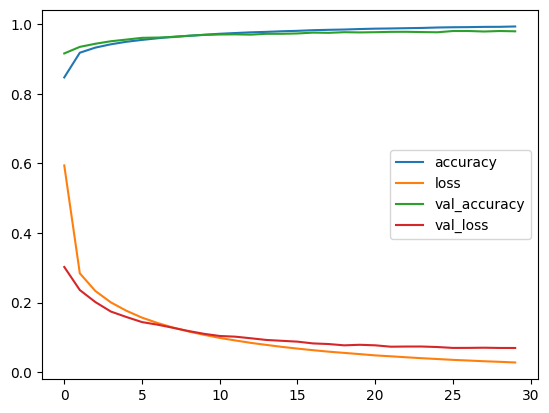

In [42]:
pd.DataFrame(history.history).plot()

## Evaluate the model

In [43]:
model_clf.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9737 - loss: 0.0880


[0.07192334532737732, 0.9778000116348267]

## Predicting for a new data

In [45]:
# Lets check with first 3 test data

x_new = x_test[:3]
y_actual = y_test[:3]

y_actual

array([7, 2, 1], dtype=uint8)

Sample data 0
Sample data 1
Sample data 2


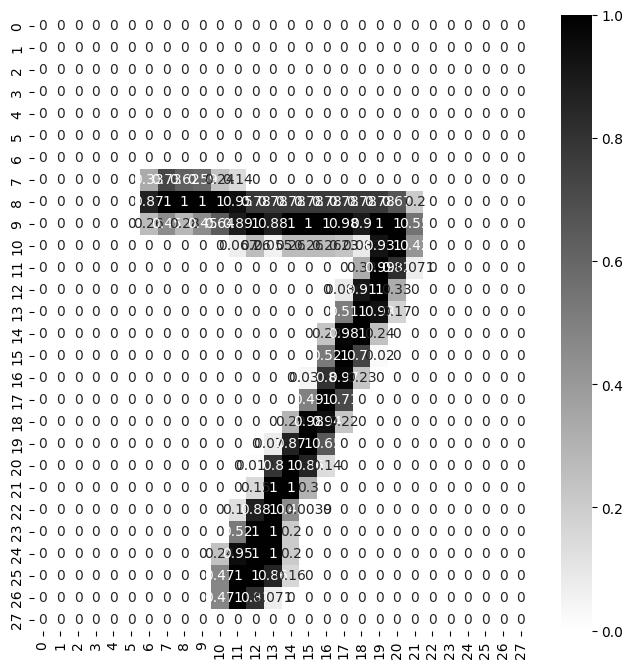

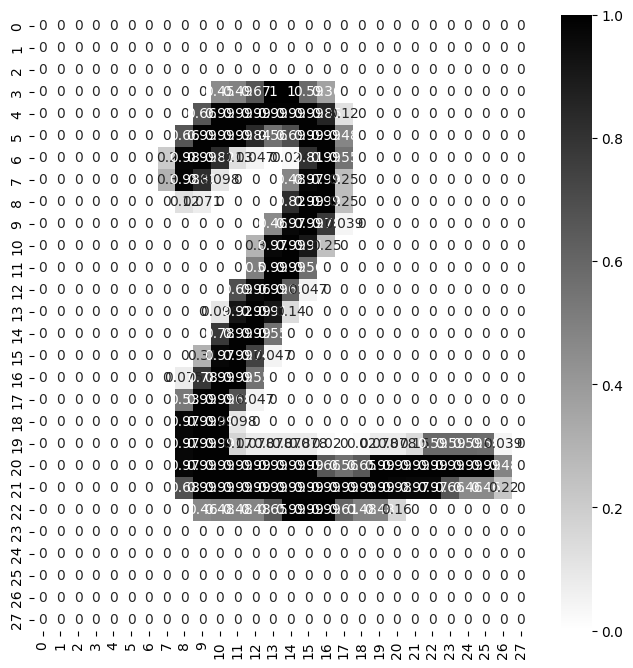

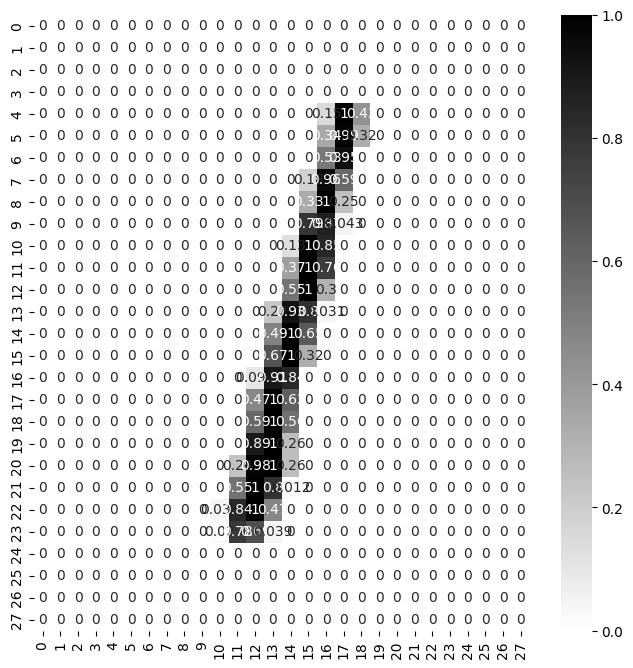

In [49]:
# Visulaize the sample data

for i in range(3):
  plt.figure(figsize= (8,8))
  print(f"Sample data {i}")
  sns.heatmap(x_test[i], annot= True, cmap = "binary")


As we know that here the O/P layer have the "Softmax A.F." and consists 10 nodes/neurons.

It displays the probablities of being numbers 0 - 9.

Eg: If we predict for 1 new data, then we get 1 array i.e. Probablity array and the index containing the maximum probablity will be the number in the image.

In [50]:
y_prob = model_clf.predict(x_new)
y_prob.round(3)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 342ms/step


array([[0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 1.   , 0.   ,
        0.   ],
       [0.   , 0.   , 1.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   ],
       [0.   , 0.997, 0.   , 0.   , 0.   , 0.   , 0.   , 0.001, 0.001,
        0.   ]], dtype=float32)

Here, we get 3 O/P arrays for 3 Xnew sample data.

It shows that:

i.) y_pred1 = 7 as prob(index=7) is 1

ii.) y_pred2 = 2 as prob(index=2) is 1

iii.) y_pred3 = 1 as prob(index=1) is 0.997 which is maximum in this array.

In [51]:
# To gt the y_pred through code

y_pred  = np.argmax(y_prob, axis= -1)
y_pred

array([7, 2, 1])

## Plotting the Actual and Predicted data

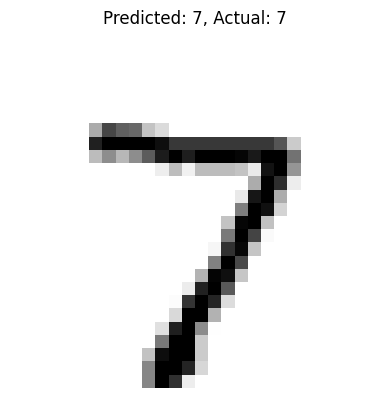

MMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMM


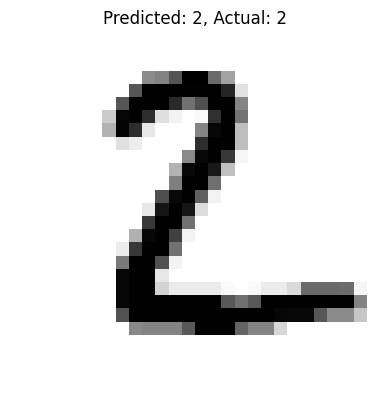

MMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMM


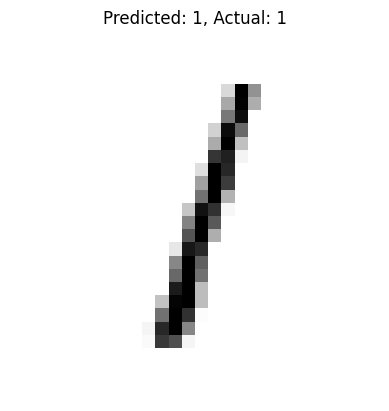

MMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMM


In [53]:
for data, prediction, actual in zip(x_new, y_pred, y_actual):
  plt.imshow(data, cmap= "binary")
  plt.title(f"Predicted: {prediction}, Actual: {actual}")
  plt.axis("off")
  plt.show()
  print("MMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMM"*2)


# Performance Summary

The train and Vaid acucracy are high and similar, so NO OVERFITTING.

We predicted correctly with this ANN model, so GOOD MODEL.